In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from sklearn.metrics import r2_score

In [2]:
df= pd.read_csv('data/price/price_baechoo.csv')
df

,구분,평균
0,2000-01-03,5600.0
1,2000-01-04,5600.0
2,2000-01-05,5620.0
3,2000-01-06,5700.0
4,2000-01-07,5670.0
...,...,...
5890,2022-12-14,5430.5
5891,2022-12-15,5430.5
5892,2022-12-16,5304.0
5893,2022-12-19,5459.5


In [3]:
num_list= []
for i in range(1,1179):
    num_list.append(i*3)
    num_list.append(i*3)
    
price_open=[]
price_high=[]
price_low= []
price_close= []
for i in range(len(num_list)):
    if i==0:
        test_df= df.iloc[0:num_list[i]]
    else:
        test_df= df.iloc[num_list[i-1]:num_list[i]]
    price_open.append(test_df.iloc[0]['평균'])
    max= test_df.iloc[0]['평균']
    min= test_df.iloc[0]['평균']
    for i in range(len(test_df)):
        if test_df.iloc[i]['평균'] > max:
            max= test_df.iloc[i]['평균']
        if test_df.iloc[i]['평균'] < min:
            min= test_df.iloc[i]['평균']
    price_high.append(max)
    price_low.append(min)
    price_close.append(test_df.iloc[len(test_df)-1]['평균'])

IndexError: single positional indexer is out-of-bounds

In [ ]:
candle_df= pd.DataFrame(columns=['시가', '고가', '저가', '종가'])
candle_df['시가']= price_open
candle_df['고가']= price_high
candle_df['저가']= price_low
candle_df['종가']= price_close
candle_df

,시가,고가,저가,종가
0,5600.0,5620.0,5600.0,5620.0
1,5700.0,5770.0,5670.0,5770.0
2,5790.0,5790.0,5630.0,5630.0
3,5630.0,5630.0,5630.0,5630.0
4,5630.0,5650.0,5630.0,5650.0
...,...,...,...,...
1173,11600.0,11600.0,11400.0,11400.0
1174,11300.0,11300.0,11100.0,11100.0
1175,11700.0,11700.0,11300.0,11300.0
1176,11300.0,11300.0,11300.0,11300.0


In [ ]:
X= candle_df[['시가', '고가', '저가']]
y= candle_df[['종가']]

scaler= StandardScaler()
scaler1= StandardScaler()

X_sc= scaler.fit_transform(X)
y_sc= scaler1.fit_transform(y)

In [ ]:
window_size = 2

data_X = []
data_y = []
for i in range(len(y_sc) - window_size):
    _X = X_sc[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y_sc[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[1.90404825 1.77699273 1.88425143]
 [1.77875147 1.6567051  1.88425143]] -> [1.74931111]


In [ ]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (823, 2, 3) (823, 1)
테스트 데이터의 크기 : (353, 2, 3) (353, 1)


In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=20, activation='relu', input_shape=(2, 3)))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
lstm_model.fit(train_X, train_y, epochs=70, batch_size=30, callbacks=[early_stop])

Epoch 1/70
28/28 [==============================] - 1s 2ms/step - loss: 0.4412
Epoch 2/70
28/28 [==============================] - 0s 2ms/step - loss: 0.2237
Epoch 3/70
28/28 [==============================] - 0s 2ms/step - loss: 0.1122
Epoch 4/70
28/28 [==============================] - 0s 2ms/step - loss: 0.0669
Epoch 5/70
28/28 [==============================] - 0s 2ms/step - loss: 0.0492
Epoch 6/70
28/28 [==============================] - 0s 2ms/step - loss: 0.0470
Epoch 7/70
28/28 [==============================] - 0s 2ms/step - loss: 0.0463
Epoch 8/70
28/28 [==============================] - 0s 2ms/step - loss: 0.0456
Epoch 9/70
28/28 [==============================] - 0s 2ms/step - loss: 0.0446
Epoch 10/70
28/28 [==============================] - 0s 2ms/step - loss: 0.0435
Epoch 11/70
28/28 [==============================] - 0s 2ms/step - loss: 0.0424
Epoch 12/70
28/28 [==============================] - 0s 2ms/step - loss: 0.0412
Epoch 13/70
28/28 [==============================

In [ ]:
pred_y = lstm_model.predict(test_X)

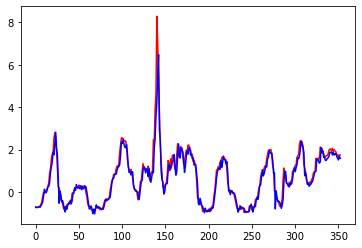

In [ ]:
plt.figure()
plt.plot(test_y, color='red')
plt.plot(pred_y, color='blue')
plt.show()

In [ ]:
test_score= r2_score(test_y, pred_y)
print(test_score)

0.9095418965182176


In [ ]:
num_list= []
for i in range(1900, 1965):
    num_list.append(i*3)

open=[]
high=[]
low= []
close= []
for i in range(len(num_list)):
    if i == 0:
        test_df= df.iloc[3534:num_list[0]]
    else:
        test_df= df.iloc[num_list[i-1]:num_list[i]]
    open.append(test_df.iloc[0]['평균'])
    max= test_df.iloc[0]['평균']
    min= test_df.iloc[0]['평균']
    for i in range(len(test_df)):
        if test_df.iloc[i]['평균'] > max:
            max= test_df.iloc[i]['평균']
        if test_df.iloc[i]['평균'] < min:
            min= test_df.iloc[i]['평균']
    high.append(max)
    low.append(min)
    close.append(test_df.iloc[len(test_df)-1]['평균'])

In [ ]:
df_test= pd.DataFrame(columns=['시가', '고가', '저가', '종가'])
df_test['시가']= open
df_test['고가']= high
df_test['저가']= low
df_test['종가']= close
df_test

,시가,고가,저가,종가
0,10700.0,27880.0,2600.0,8644.0
1,9016.0,9312.0,9016.0,9312.0
2,9117.0,9492.0,9117.0,9492.0
3,9532.0,10220.0,9532.0,10220.0
4,9785.0,9865.0,9785.0,9845.0
...,...,...,...,...
60,6100.0,6100.0,5664.0,5664.0
61,5592.0,5592.0,5242.0,5462.0
62,5982.0,5982.0,5488.0,5488.0
63,5408.0,5408.0,5244.5,5244.5


In [ ]:
f_test_X= df_test[['시가', '고가', '저가']]
f_test_y= df_test[['종가']]

f_test_X_sc= scaler.fit_transform(f_test_X)
f_test_y_sc= scaler1.fit_transform(f_test_y)

In [ ]:
window_size = 2

data_X = []
data_y = []
for i in range(len(f_test_y_sc) - window_size):
    _X = f_test_X_sc[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = f_test_y_sc[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[-0.96749181 -0.99539578 -0.99256208]
 [-1.04152587 -1.06457495 -1.0261188 ]] -> [-1.02517334]


In [ ]:
check_X = np.array(data_X)
check_y = np.array(data_y)

In [ ]:
pred_check_y= lstm_model.predict(check_X)

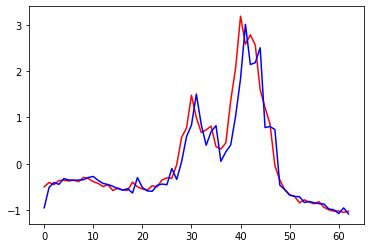

In [ ]:
plt.figure()
plt.plot(check_y, color='red')
plt.plot(pred_check_y, color='blue')
plt.show()

In [ ]:
test_score= r2_score(check_y, pred_check_y)
print(test_score)

0.8723973941871067


In [ ]:
y_pred=scaler1.inverse_transform(pred_check_y)

#  예측값을 데이터프레임에 저장한다
df_pred = pd.DataFrame(y_pred, columns=['예측 가격'])

y_actual= scaler1.inverse_transform(check_y)

df_pred['실제 가격']= y_actual

df_pred['차이']= (df_pred['실제 가격']-df_pred['예측 가격']) / df_pred['실제 가격'] * 100

df_pred

,예측 가격,실제 가격,차이
0,6011.226562,9492.0,36.670601
1,9396.472656,10220.0,8.057997
2,10212.710938,9845.0,-3.735002
3,9901.767578,10540.0,6.055336
4,10852.782227,10580.0,-2.578282
...,...,...,...
58,5808.634766,5664.0,-2.553580
59,5681.124023,5462.0,-4.011791
60,5062.284180,5488.0,7.757212
61,5983.941895,5244.5,-14.099378


c:\Users\LG-PC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\LG-PC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\LG-PC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\LG-PC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\LG-PC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\LG-PC\anaconda3\l

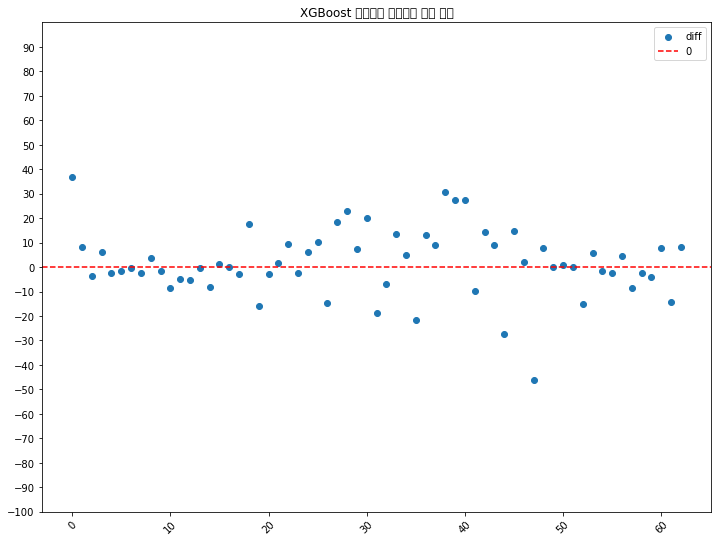

In [ ]:
# 예측값과 실제값의 차이를 시각화한다,
plt.figure(figsize=(12, 9))
# y축의 범위를 -10과 10 사이로 설정한다
plt.ylim(-100, 100)
# y축의 눈금을 -10부터 10까지 2간격으로 설정한다
plt.yticks(np.arange(-100, 100, 10))
# 글자가 겹치지 않도록 회전한다
plt.xticks(rotation=45)
plt.scatter(df_pred.index, df_pred['차이'])
plt.axhline(y=0, color='red', linestyle='--')
plt.title('XGBoost 실제값과 예측값의 차이 비율')
# 범례를 표시한다
plt.legend(['diff', '0'])
plt.show()